In [1]:
import pandas as pd
from underthesea import word_tokenize
from collections import Counter

In [2]:
df_train = pd.read_csv("C:/Users/FPTSHOP/OneDrive/Documents/SAV/CrawlData/mobileData/mobileData_train.csv", index_col = 0)
df_test = pd.read_csv("C:/Users/FPTSHOP/OneDrive/Documents/SAV/CrawlData/mobileData/mobileData_test.csv", index_col = 0)

In [3]:
df_train.head()

,comment,n_star,date_time,label
index,,,,
0,Mới mua máy này Tại thegioididong thốt nốt cảm...,5,2 tuần trước,{CAMERA#Positive};{FEATURES#Positive};{BATTERY...
1,Pin kém còn lại miễn chê mua 8/3/2019 tình trạ...,5,14/09/2019,{BATTERY#Negative};{GENERAL#Positive};{OTHERS};
2,Sao lúc gọi điện thoại màn hình bị chấm nhỏ nh...,3,17/08/2020,{FEATURES#Negative};
3,"Mọi người cập nhật phần mềm lại , nó sẽ bớt tố...",3,29/02/2020,{FEATURES#Negative};{BATTERY#Neutral};{GENERAL...
4,"Mới mua Sài được 1 tháng thấy pin rất trâu, Sà...",5,4/6/2020,{BATTERY#Positive};{PERFORMANCE#Positive};{SER...


In [4]:
df_test.head()

,comment,n_star,date_time,label
index,,,,
2214,"Giá hợp lý, cấu hình tốt. Nhìn chung hài lòng ...",5,16/03/2020,{PERFORMANCE#Positive};{PRICE#Positive};{GENER...
2215,"Máy khá là ngon trong tầm giá này , nhưng máy ...",5,7/8/2020,{PRICE#Neutral};{GENERAL#Positive};{OTHERS};
2216,"Sản phẩm bị giật khi chơi game , gọi zalo. Đã ...",1,22/03/2020,{PERFORMANCE#Negative};{OTHERS};
2217,sao mình thấy máy ảnh cứ vỡ kiểu nhòe. rồi v...,3,1 tuần trước,{CAMERA#Negative};
2218,"Sp sử dụng rất tốt, hiệu năng ổn, chơi game mư...",5,25/02/2020,{CAMERA#Positive};{BATTERY#Positive};{PERFORMA...


## **Preprocessing**

In [5]:
col_drop = ['n_star', 'date_time']
df_train = df_train.drop(columns=col_drop, axis =1)
df_train.head()

,comment,label
index,,
0,Mới mua máy này Tại thegioididong thốt nốt cảm...,{CAMERA#Positive};{FEATURES#Positive};{BATTERY...
1,Pin kém còn lại miễn chê mua 8/3/2019 tình trạ...,{BATTERY#Negative};{GENERAL#Positive};{OTHERS};
2,Sao lúc gọi điện thoại màn hình bị chấm nhỏ nh...,{FEATURES#Negative};
3,"Mọi người cập nhật phần mềm lại , nó sẽ bớt tố...",{FEATURES#Negative};{BATTERY#Neutral};{GENERAL...
4,"Mới mua Sài được 1 tháng thấy pin rất trâu, Sà...",{BATTERY#Positive};{PERFORMANCE#Positive};{SER...


In [6]:
df_test = df_test.drop(columns=col_drop, axis =1)
df_test.head()

,comment,label
index,,
2214,"Giá hợp lý, cấu hình tốt. Nhìn chung hài lòng ...",{PERFORMANCE#Positive};{PRICE#Positive};{GENER...
2215,"Máy khá là ngon trong tầm giá này , nhưng máy ...",{PRICE#Neutral};{GENERAL#Positive};{OTHERS};
2216,"Sản phẩm bị giật khi chơi game , gọi zalo. Đã ...",{PERFORMANCE#Negative};{OTHERS};
2217,sao mình thấy máy ảnh cứ vỡ kiểu nhòe. rồi v...,{CAMERA#Negative};
2218,"Sp sử dụng rất tốt, hiệu năng ổn, chơi game mư...",{CAMERA#Positive};{BATTERY#Positive};{PERFORMA...


In [7]:
import numpy as np
seq_len = [len(i.split()) for i in df_train.comment]
seq_mean = np.mean(seq_len)
seq_std = np.std(seq_len)
max_num = np.max(seq_len)
print(seq_mean,"\n", seq_std,"\n", max_num)


36.3138 
 20.319304357187033 
 205


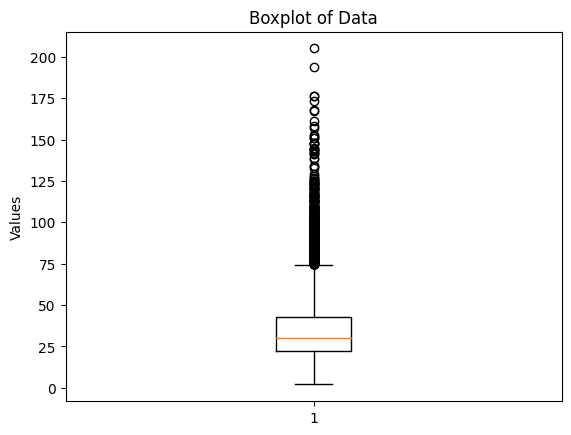

In [8]:
import matplotlib.pyplot as plt


# Create a boxplot
plt.boxplot(seq_len)

# Add labels
plt.title('Boxplot of Data')
plt.ylabel('Values')

# Show the plot
plt.show()


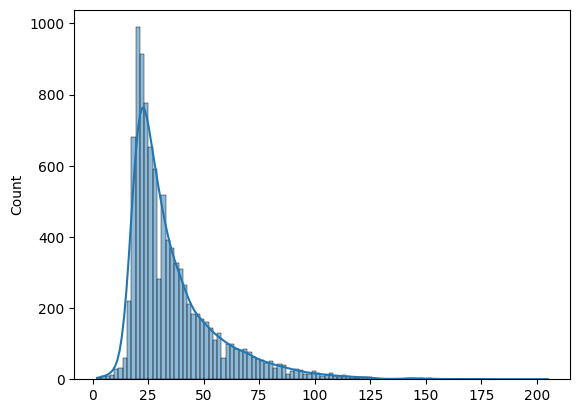

In [9]:
import seaborn as sns
sns.histplot(seq_len, kde=True)

# Show the plot
plt.show()

In [10]:
import re
from underthesea import word_tokenize

def preprocess_text(text):
    #Chuẩn hóa tiếng Việt, xử lý emoj, chuẩn hóa tiếng Anh, thuật ngữ
    replace_list = {
            'òa': 'oà', 'óa': 'oá', 'ỏa': 'oả', 'õa': 'oã', 'ọa': 'oạ', 'òe': 'oè', 'óe': 'oé','ỏe': 'oẻ',
            'õe': 'oẽ', 'ọe': 'oẹ', 'ùy': 'uỳ', 'úy': 'uý', 'ủy': 'uỷ', 'ũy': 'uỹ','ụy': 'uỵ', 'uả': 'ủa',
            'ả': 'ả', 'ố': 'ố', 'u´': 'ố','ỗ': 'ỗ', 'ồ': 'ồ', 'ổ': 'ổ', 'ấ': 'ấ', 'ẫ': 'ẫ', 'ẩ': 'ẩ',
            'ầ': 'ầ', 'ỏ': 'ỏ', 'ề': 'ề','ễ': 'ễ', 'ắ': 'ắ', 'ủ': 'ủ', 'ế': 'ế', 'ở': 'ở', 'ỉ': 'ỉ',
            'ẻ': 'ẻ', 'àk': u' à ','aˋ': 'à', 'iˋ': 'ì', 'ă´': 'ắ','ử': 'ử', 'e˜': 'ẽ', 'y˜': 'ỹ', 'a´': 'á',
            #Quy các icon về 2 loại emoj: Tích cực hoặc tiêu cực
            "👹": "negative", "👻": "positive", "💃": "positive",'🤙': ' positive ', '👍': ' positive ',
            "💄": "positive", "💎": "positive", "💩": "positive","😕": "negative", "😱": "negative", "😸": "positive",
            "😾": "negative", "🚫": "negative",  "🤬": "negative","🧚": "positive", "🧡": "positive",'🐶':' positive ',
            '👎': ' negative ', '😣': ' negative ','✨': ' positive ', '❣': ' positive ','☀': ' positive ',
            '♥': ' positive ', '🤩': ' positive ', 'like': ' positive ', '💌': ' positive ',
            '🤣': ' positive ', '🖤': ' positive ', '🤤': ' positive ', ':(': ' negative ', '😢': ' negative ',
            '❤': ' positive ', '😍': ' positive ', '😘': ' positive ', '😪': ' negative ', '😊': ' positive ',
            '?': ' ? ', '😁': ' positive ', '💖': ' positive ', '😟': ' negative ', '😭': ' negative ',
            '💯': ' positive ', '💗': ' positive ', '♡': ' positive ', '💜': ' positive ', '🤗': ' positive ',
            '^^': ' positive ', '😨': ' negative ', '☺': ' positive ', '💋': ' positive ', '👌': ' positive ',
            '😖': ' negative ', '😀': ' positive ', ':((': ' negative ', '😡': ' negative ', '😠': ' negative ',
            '😒': ' negative ', '🙂': ' positive ', '😏': ' negative ', '😝': ' positive ', '😄': ' positive ',
            '😙': ' positive ', '😤': ' negative ', '😎': ' positive ', '😆': ' positive ', '💚': ' positive ',
            '✌': ' positive ', '💕': ' positive ', '😞': ' negative ', '😓': ' negative ', '️🆗️': ' positive ',
            '😉': ' positive ', '😂': ' positive ', ':v': '  positive ', '=))': '  positive ', '😋': ' positive ',
            '💓': ' positive ', '😐': ' negative ', ':3': ' positive ', '😫': ' negative ', '😥': ' negative ',
            '😃': ' positive ', '😬': ' 😬 ', '😌': ' 😌 ', '💛': ' positive ', '🤝': ' positive ', '🎈': ' positive ',
            '😗': ' positive ', '🤔': ' negative ', '😑': ' negative ', '🔥': ' negative ', '🙏': ' negative ',
            '🆗': ' positive ', '😻': ' positive ', '💙': ' positive ', '💟': ' positive ',
            '😚': ' positive ', '❌': ' negative ', '👏': ' positive ', ';)': ' positive ', '<3': ' positive ',
            '🌝': ' positive ',  '🌷': ' positive ', '🌸': ' positive ', '🌺': ' positive ',
            '🌼': ' positive ', '🍓': ' positive ', '🐅': ' positive ', '🐾': ' positive ', '👉': ' positive ',
            '💐': ' positive ', '💞': ' positive ', '💥': ' positive ', '💪': ' positive ',
            '💰': ' positive ',  '😇': ' positive ', '😛': ' positive ', '😜': ' positive ',
            '🙃': ' positive ', '🤑': ' positive ', '🤪': ' positive ','☹': ' negative ',  '💀': ' negative ',
            '😔': ' negative ', '😧': ' negative ', '😩': ' negative ', '😰': ' negative ', '😳': ' negative ',
            '😵': ' negative ', '😶': ' negative ', '🙁': ' negative ',
            #Chuẩn hóa 1 số sentiment words/English words
            ':))': '  positive ', ':)': ' positive ', 'ô kêi': ' ok ', 'okie': ' ok ', ' o kê ': ' ok ',
            'okey': ' ok ', 'ôkê': ' ok ', 'oki': ' ok ', ' oke ':  ' ok ',' okay':' ok ','okê':' ok ',
            ' tks ': u' cám ơn ', 'thks': u' cám ơn ', 'thanks': u' cám ơn ', 'ths': u' cám ơn ', 'thank': u' cám ơn ',
            '⭐': 'star ', '*': 'star ', '🌟': 'star ', '🎉': u' positive ',
            'kg ': u' không ','not': u' không ', u' kg ': u' không ', '"k ': u' không ',' kh ':u' không ','kô':u' không ','hok':u' không ',' kp ': u' không phải ',u' kô ': u' không ', '"ko ': u' không ', u' ko ': u' không ', u' k ': u' không ', 'khong': u' không ', u' hok ': u' không ',
            'he he': ' positive ','hehe': ' positive ','hihi': ' positive ', 'haha': ' positive ', 'hjhj': ' positive ',
            ' lol ': ' negative ',' cc ': ' negative ','cute': u' dễ thương ','huhu': ' negative ', ' vs ': u' với ', 'wa': ' quá ', 'wá': u' quá', 'j': u' gì ', '“': ' ',
            ' sz ': u' cỡ ', 'size': u' cỡ ', u' đx ': u' được ', 'dk': u' được ', 'dc': u' được ', 'đk': u' được ',
            'đc': u' được ','authentic': u' chuẩn chính hãng ',u' aut ': u' chuẩn chính hãng ', u' auth ': u' chuẩn chính hãng ', 'thick': u' positive ', 'store': u' cửa hàng ',
            'shop': u' cửa hàng ', 'sp': u' sản phẩm ', 'gud': u' tốt ','god': u' tốt ','wel done':' tốt ', 'good': u' tốt ', 'gút': u' tốt ',
            'sấu': u' xấu ','gut': u' tốt ', u' tot ': u' tốt ', u' nice ': u' tốt ', 'perfect': 'rất tốt', 'bt': u' bình thường ',
            'time': u' thời gian ', 'qá': u' quá ', u' ship ': u' giao hàng ', u' m ': u' mình ', u' mik ': u' mình ',
            'ể': 'ể', 'product': 'sản phẩm', 'quality': 'chất lượng','chat':' chất ', 'excelent': 'hoàn hảo', 'bad': 'tệ','fresh': ' tươi ','sad': ' tệ ',
            'date': u' hạn sử dụng ', 'hsd': u' hạn sử dụng ','quickly': u' nhanh ', 'quick': u' nhanh ','fast': u' nhanh ','delivery': u' giao hàng ',u' síp ': u' giao hàng ',
            'beautiful': u' đẹp tuyệt vời ', u' tl ': u' trả lời ', u' r ': u' rồi ', u' shopE ': u' cửa hàng ',u' order ': u' đặt hàng ',
            'chất lg': u' chất lượng ',u' sd ': u' sử dụng ',u' dt ': u' điện thoại ',u' nt ': u' nhắn tin ',u' tl ': u' trả lời ',u' sài ': u' xài ',u'bjo':u' bao giờ ',
            'thik': u' thích ',u' sop ': u' cửa hàng ', ' fb ': ' facebook ', ' face ': ' facebook ', ' very ': u' rất ',u'quả ng ':u' quảng  ',
            'dep': u' đẹp ',u' xau ': u' xấu ','delicious': u' ngon ', u'hàg': u' hàng ', u'qủa': u' quả ','bk':'biết',
            'iu': u' yêu ','fake': u' giả mạo ', 'trl': 'trả lời', '><': u' positive ', 'dthoai':'điện thoại','thegioididong':'thế giới di động', 'đt': 'điện thoại','dt': 'điện thoại',
            ' por ': u' tệ ',' poor ': u' tệ ', 'ib':u' nhắn tin ', 'rep':u' trả lời ',u'fback':' feedback ','fedback':' feedback ','zin':'mới','fb': 'mạng xã hội','lag':'negative',
            'hazzz': 'negative','test': 'thử','bit': 'biết', 'ak':'à','noiz':'nói','rats':'rất','j':'gì','diss':'negative',
            '4 sao': 'tốt','5 sao': 'tốt','1 sao': 'tệ', 'phên': 'tốt','kog': 'không', 'mia': 'mua', 'ja':'giá','way':'quay', 'zay':'vậy'}
    #Remove các ký tự kéo dài: vd: đẹppppppp

    text = re.sub(r'([A-Z])\1+', lambda m: m.group(1).upper(), text, flags=re.IGNORECASE)
    
    text = text.lower()

    for k, v in replace_list.items():
        text = text.replace(k, v)

    tokens = word_tokenize(text)
    # Join the tokens into a single string
    text_processed = ' '.join(tokens)

    # Remove punctuation
    text_processed = re.sub(r'[^\w\s]', '', text_processed)

    # Remove extra spaces
    text_processed = re.sub(r'\s+', ' ', text_processed).strip()

    return text_processed

# Test the function
processed_text = preprocess_text("Hôm nay tôi buồnnnn ĐT, bk hay vui? m Tôi rất vui khi noiz bit ak:(((")
print(processed_text)

hôm nay tôi buồn điện thoại biết hay vui mình tôi rất vui khi nói biết à negative


In [11]:
df_train['comment'] = df_train['comment'].apply(preprocess_text)
df_test['comment'] = df_test['comment'].apply(preprocess_text)

In [12]:
df_train

,comment,label
index,,
0,mới mua máy này tại thế giới di động thốt nốt ...,{CAMERA#Positive};{FEATURES#Positive};{BATTERY...
1,pin kém còn lại miễn chê mua 832019 tình trạng...,{BATTERY#Negative};{GENERAL#Positive};{OTHERS};
2,sao lúc gọi điện thoại màn hình bị chấm nhỏ nh...,{FEATURES#Negative};
3,mọi người cập nhật phần mềm lại nó sẽ bớt tốn ...,{FEATURES#Negative};{BATTERY#Neutral};{GENERAL...
4,mới mua xài được 1 tháng thấy pin rất trâu xài...,{BATTERY#Positive};{PERFORMANCE#Positive};{SER...
...,...,...
2209,theo trải nghiệm của tôi thì tầm giá này thì m...,{BATTERY#Negative};{PRICE#Neutral};{GENERAL#Po...
2210,máy chụp hình đẹp cá nhân mình thấy hơi nóng k...,{CAMERA#Positive};{FEATURES#Positive};{BATTERY...
2211,lần đầu nhìn máy rất ấn tượng về thiết kế came...,{SCREEN#Positive};{CAMERA#Positive};{BATTERY#P...


### **Parsing the Labels**

In [13]:
# Regular expression pattern to match aspect names and labels
pattern = r'{([^#]*)#([^}]*)'

# Initialize dictionary to store counts
aspect_label_counts = {}

# Extract aspect names and labels
for sentence in df_train.label:
    matches = re.findall(pattern, sentence)
    for aspect, label in matches:
        if aspect not in aspect_label_counts:
            aspect_label_counts[aspect] = {'Positive': 0, 'Negative': 0,'Neutral': 0}
        aspect_label_counts[aspect][label] += 1

# Convert to DataFrame
df_check_label = pd.DataFrame(aspect_label_counts).T.reset_index()
df_check_label.columns = ['Aspect', 'Positive', 'Negative','Neutral']

In [14]:
df_check_label

,Aspect,Positive,Negative,Neutral
0,CAMERA,1575,797,359
1,FEATURES,984,2118,250
2,BATTERY,2578,1596,441
3,PRICE,770,395,1463
4,GENERAL,4626,1243,373
5,SER&ACC,1797,654,134
6,PERFORMANCE,2850,1948,507
7,SCREEN,650,495,73
8,DESIGN,1271,398,105
9,STORAGE,77,27,14


In [15]:
def process_row(row):
    categories = row.split(';')
    categories = [category.strip() for category in categories if category.strip() != '{OTHERS}']
    return ';'.join(categories)

# Apply the process_row function to the 'label' column
df_train['label'] = df_train['label'].apply(process_row)

# Print the updated dataframe
df_train

,comment,label
index,,
0,mới mua máy này tại thế giới di động thốt nốt ...,{CAMERA#Positive};{FEATURES#Positive};{BATTERY...
1,pin kém còn lại miễn chê mua 832019 tình trạng...,{BATTERY#Negative};{GENERAL#Positive};
2,sao lúc gọi điện thoại màn hình bị chấm nhỏ nh...,{FEATURES#Negative};
3,mọi người cập nhật phần mềm lại nó sẽ bớt tốn ...,{FEATURES#Negative};{BATTERY#Neutral};{GENERAL...
4,mới mua xài được 1 tháng thấy pin rất trâu xài...,{BATTERY#Positive};{PERFORMANCE#Positive};{SER...
...,...,...
2209,theo trải nghiệm của tôi thì tầm giá này thì m...,{BATTERY#Negative};{PRICE#Neutral};{GENERAL#Po...
2210,máy chụp hình đẹp cá nhân mình thấy hơi nóng k...,{CAMERA#Positive};{FEATURES#Positive};{BATTERY...
2211,lần đầu nhìn máy rất ấn tượng về thiết kế came...,{SCREEN#Positive};{CAMERA#Positive};{BATTERY#P...


In [16]:
def extract_aspect_sentiment(label):
    aspect_sentiments = []
    for pair in label.split(';'):
        if pair.startswith('{') and pair.endswith('}'):
            aspect_sentiment = pair.strip('{}').split('#')
            if len(aspect_sentiment) == 2:
                aspect, sentiment = aspect_sentiment
                aspect_sentiments.append((aspect, sentiment))
    return aspect_sentiments

# Step 2: Apply the function to create Aspect and Sentiment columns
df_train['label'] = df_train['label'].apply(extract_aspect_sentiment)

df_train

,comment,label
index,,
0,mới mua máy này tại thế giới di động thốt nốt ...,"[(CAMERA, Positive), (FEATURES, Positive), (BA..."
1,pin kém còn lại miễn chê mua 832019 tình trạng...,"[(BATTERY, Negative), (GENERAL, Positive)]"
2,sao lúc gọi điện thoại màn hình bị chấm nhỏ nh...,"[(FEATURES, Negative)]"
3,mọi người cập nhật phần mềm lại nó sẽ bớt tốn ...,"[(FEATURES, Negative), (BATTERY, Neutral), (GE..."
4,mới mua xài được 1 tháng thấy pin rất trâu xài...,"[(BATTERY, Positive), (PERFORMANCE, Positive),..."
...,...,...
2209,theo trải nghiệm của tôi thì tầm giá này thì m...,"[(BATTERY, Negative), (PRICE, Neutral), (GENER..."
2210,máy chụp hình đẹp cá nhân mình thấy hơi nóng k...,"[(CAMERA, Positive), (FEATURES, Positive), (BA..."
2211,lần đầu nhìn máy rất ấn tượng về thiết kế came...,"[(SCREEN, Positive), (CAMERA, Positive), (BATT..."


In [21]:
df_test['label'] = df_test['label'].apply(process_row)

In [22]:
df_test['label'] = df_test['label'].apply(extract_aspect_sentiment)

In [23]:
df_test

,comment,label
index,,
2214,giá hợp lý cấu hình tốt nhìn chung hài lòng về...,"[(PERFORMANCE, Positive), (PRICE, Positive), (..."
2215,máy khá là ngon trong tầm giá này nhưng máy nê...,"[(PRICE, Neutral), (GENERAL, Positive)]"
2216,sản phẩm bị giật khi chơi game gọi zalo đã đổi...,"[(PERFORMANCE, Negative)]"
2217,sao mình thấy máy ảnh cứ vỡ kiểu nhòe rồi vàng...,"[(CAMERA, Negative)]"
2218,sản phẩm sử dụng rất tốt hiệu năng ổn chơi gam...,"[(CAMERA, Positive), (BATTERY, Positive), (PER..."
...,...,...
1107,mua về xài hơn tháng giờ sạc không vào pin gửi...,"[(BATTERY, Negative), (GENERAL, Negative)]"
1108,mới mua cái samsung a10s xài chưa đầy 1 tháng ...,"[(FEATURES, Negative), (GENERAL, Negative), (S..."
1109,máy sử dụng mượt thiết kế rất ok pin cũng khá ...,"[(BATTERY, Positive), (PERFORMANCE, Positive),..."


In [19]:
df_train.to_csv("mobileData_train.csv", index = False)

In [24]:
df_test.to_csv("mobileData_test.csv", index = False)